<a href="https://colab.research.google.com/github/ivan-mihailov/LS-Unit-2-Sprint-3-Assignments/blob/main/Ivan_Mihailov_DSPT11_234_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Ingestion and initial EDA

In [1]:
import pandas as pd
import numpy as np

**Type of Problem:** Classification of Drought Conditions in U.S. Counties based on meteorological and soil data

In [2]:
# Ingest meteorological data from training dataset as dataframe
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/train_timeseries/train_timeseries.csv')
train.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [3]:
train.shape

(19300680, 21)

In [4]:
# Determine whether there are NaNs in the data and their significance (if any)
train.isna().sum()

fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [5]:
train.describe() # Explore the training dataset

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,2.756796e+06
mean,3.067038e+04,2.644145e+00,9.665578e+01,7.816178e+00,1.280146e+01,6.951072e+00,6.986916e+00,1.868141e+01,7.411665e+00,1.126974e+01,1.288900e+01,3.564013e+00,5.195993e+00,1.928879e+00,3.267113e+00,5.525151e+00,7.811798e+00,3.130077e+00,4.681721e+00,8.245298e-01
std,1.497911e+04,6.226305e+00,5.447994e+00,4.694305e+00,1.092674e+01,1.014551e+01,1.009116e+01,1.154487e+01,1.057680e+01,4.005165e+00,1.114961e+01,1.862297e+00,2.627969e+00,1.351713e+00,1.947028e+00,2.321549e+00,2.861210e+00,2.122751e+00,2.171263e+00,1.223727e+00
min,1.001000e+03,0.000000e+00,6.612000e+01,1.200000e-01,-3.734000e+01,-3.770000e+01,-3.746000e+01,-3.220000e+01,-4.596000e+01,3.000000e-02,-3.823000e+01,2.500000e-01,5.400000e-01,0.000000e+00,1.600000e-01,4.000000e-01,7.000000e-01,0.000000e+00,3.200000e-01,0.000000e+00
25%,1.904450e+04,0.000000e+00,9.584000e+01,3.780000e+00,4.450000e+00,-9.600000e-01,-9.200000e-01,1.027000e+01,-7.000000e-01,8.420000e+00,4.340000e+00,2.140000e+00,3.110000e+00,9.600000e-01,1.810000e+00,3.790000e+00,5.680000e+00,1.450000e+00,3.130000e+00,0.000000e+00
50%,2.921200e+04,1.800000e-01,9.830000e+01,6.840000e+00,1.402000e+01,7.570000e+00,7.580000e+00,2.040000e+01,8.030000e+00,1.124000e+01,1.404000e+01,3.140000e+00,4.670000e+00,1.660000e+00,2.800000e+00,5.120000e+00,7.310000e+00,2.770000e+00,4.250000e+00,0.000000e+00
75%,4.600750e+04,2.160000e+00,9.996000e+01,1.135000e+01,2.188000e+01,1.552000e+01,1.552000e+01,2.787000e+01,1.614000e+01,1.408000e+01,2.207000e+01,4.600000e+00,6.750000e+00,2.580000e+00,4.250000e+00,6.880000e+00,9.460000e+00,4.410000e+00,5.770000e+00,1.189600e+00
max,5.604300e+04,2.345900e+02,1.043200e+02,2.292000e+01,4.139000e+01,2.755000e+01,2.755000e+01,4.991000e+01,3.380000e+01,3.461000e+01,4.385000e+01,2.369000e+01,3.628000e+01,1.720000e+01,2.825000e+01,2.835000e+01,4.273000e+01,2.087000e+01,3.243000e+01,5.000000e+00


In [6]:
train.head(20)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN
5,1001,2000-01-06,0.01,101.31,3.49,4.99,-1.11,-1.07,12.89,-2.96,15.85,3.32,1.55,2.39,0.04,2.35,2.95,5.22,0.05,5.17,NaN
6,1001,2000-01-07,0.01,101.37,3.93,5.99,0.55,0.58,14.51,0.63,13.88,5.69,2.31,3.28,1.59,1.69,5.02,6.47,2.44,4.03,NaN
7,1001,2000-01-08,1.02,100.77,5.71,8.69,5.33,5.34,15.78,2.74,13.04,8.75,2.05,2.91,1.50,1.40,4.17,5.73,2.01,3.72,NaN
8,1001,2000-01-09,16.19,99.88,11.18,15.73,15.45,15.45,19.60,10.30,9.31,15.65,3.03,3.98,2.25,1.73,5.97,7.44,4.95,2.49,NaN
9,1001,2000-01-10,21.23,99.78,7.77,13.61,9.59,9.60,17.65,7.73,9.92,13.42,3.10,5.60,1.72,3.88,6.33,10.03,4.15,5.88,NaN


In [7]:
train.tail(30)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
19300650,56043,2016-12-02,0.38,83.28,2.34,-4.79,-8.58,-8.50,-1.32,-8.54,7.22,-5.47,2.13,3.50,1.21,2.28,3.33,6.55,1.28,5.27,NaN
19300651,56043,2016-12-03,0.13,82.88,1.95,-3.99,-10.63,-10.47,2.96,-9.31,12.27,-4.66,4.69,8.30,3.23,5.06,7.34,10.49,5.67,4.82,NaN
19300652,56043,2016-12-04,0.49,82.25,2.73,-1.52,-6.98,-6.91,3.31,-6.38,9.69,-2.53,5.50,6.99,3.22,3.77,8.51,11.28,5.74,5.54,NaN
19300653,56043,2016-12-05,1.83,82.25,1.88,-6.47,-12.14,-11.81,0.29,-13.75,14.04,-7.00,5.65,9.52,2.64,6.88,7.83,11.63,4.49,7.14,NaN
19300654,56043,2016-12-06,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,8.39,-11.98,2.27,3.97,0.95,3.02,3.07,5.16,0.83,4.33,0.0
19300655,56043,2016-12-07,0.27,83.50,0.82,-14.59,-19.45,-18.82,-11.73,-17.08,5.35,-14.34,1.93,3.55,0.15,3.40,2.25,3.89,0.21,3.68,NaN
19300656,56043,2016-12-08,0.06,83.56,0.93,-13.58,-18.39,-17.91,-7.40,-19.04,11.64,-13.83,2.94,4.07,1.48,2.58,3.83,5.15,2.10,3.05,NaN
19300657,56043,2016-12-09,0.98,82.99,2.36,-6.32,-8.90,-8.83,-1.50,-12.08,10.58,-6.77,1.95,3.30,0.53,2.77,3.04,5.60,0.79,4.80,NaN
19300658,56043,2016-12-10,0.86,82.13,3.90,0.06,-2.40,-2.39,4.19,-3.14,7.34,-1.18,4.35,5.19,3.33,1.87,7.42,9.59,5.76,3.83,NaN
19300659,56043,2016-12-11,0.24,82.49,2.09,-3.65,-10.00,-9.83,1.19,-7.00,8.19,-4.80,3.79,6.73,1.32,5.41,6.05,9.11,2.12,6.99,NaN


In [8]:
train['score'].value_counts() # Determine the type of values in the 'score' column

0.0000    1480827
1.0000     219135
2.0000     123789
3.0000      82801
4.0000      45841
           ...   
1.0601          1
0.8077          1
1.0362          1
2.7554          1
4.6692          1
Name: score, Length: 55294, dtype: int64

# **This Dataset is too large as presented**


*   It frequently crashes Google Colab when more computer-intensive tasks are performed;
*   The data itself is messy (daily meteorogical observations but only weekly measurements of drought)

**Conclusion:** Subset and only use one state (Pennsylvania) for Portfolio Project



In [9]:
# Define wrangling function for training, validation, and test datasets
def wrangle(df):
  
  # Isolate PA counties in the training dataset
  condition = ((df['fips'] == 42001) | (df['fips'] == 42003) | 
             (df['fips'] == 42005) | (df['fips'] == 42007) | 
             (df['fips'] == 42009) | (df['fips'] == 42011) | 
             (df['fips'] == 42013) | (df['fips'] == 42015) | 
             (df['fips'] == 42017) | (df['fips'] == 42019) | 
             (df['fips'] == 42021) | (df['fips'] == 42023) | 
             (df['fips'] == 42025) | (df['fips'] == 42027) |
             (df['fips'] == 42029)	| (df['fips'] == 42031) |
             (df['fips'] == 42033)	| (df['fips'] == 42035) |	
             (df['fips'] == 42037)	| (df['fips'] == 42039) |
             (df['fips'] == 42041)	| (df['fips'] == 42043) |
             (df['fips'] == 42045)	| (df['fips'] == 42047) |
             (df['fips'] == 42049) | (df['fips'] == 42051) |
             (df['fips'] == 42053) | (df['fips'] == 42055) |
             (df['fips'] == 42057) | (df['fips'] == 42059) |
             (df['fips'] == 42061) |	(df['fips'] == 42063) |	
             (df['fips'] == 42065) |	(df['fips'] == 42067) |
             (df['fips'] == 42069)	| (df['fips'] == 42071) |	
             (df['fips'] == 42073) |	(df['fips'] == 42075) |
             (df['fips'] == 42077) |	(df['fips'] == 42079) |
             (df['fips'] == 42081) |	(df['fips'] == 42083) |
             (df['fips'] == 42085) |	(df['fips'] == 42087) | 
             (df['fips'] == 42089) | (df['fips'] == 42091) |
             (df['fips'] == 42093)	| (df['fips'] == 42095) |
             (df['fips'] == 42097)	| (df['fips'] == 42099) |	
             (df['fips'] == 42101)	| (df['fips'] == 42103) |
             (df['fips'] == 42105)	| (df['fips'] == 42107) |
             (df['fips'] == 42109)	| (df['fips'] == 42111) |
             (df['fips'] == 42113)	| (df['fips'] == 42115) | 
             (df['fips'] == 42117) | (df['fips'] == 42119) |
             (df['fips'] == 42121) | (df['fips'] == 42123) |
             (df['fips'] == 42125)	| (df['fips'] == 42127) |
             (df['fips'] == 42129)	| (df['fips'] == 42131) |
             (df['fips'] == 42133))
  
  df = df[condition]
   
  return df

In [10]:
train_pa = wrangle(train)

In [11]:
train_pa.shape

(416070, 21)

In [12]:
# Ingest soil data as dataframe
soil = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/soil_data.csv')
soil.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,0.0000,0.0,0.1033,0.1859,0.2003,0.1898,0.3207,0.9974,27.940498,0.2889,2.750274,10.714703,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,0.0000,0.0,0.1415,0.2379,0.2183,0.1997,0.2026,0.0000,0.000000,0.4146,2.225602,22.952839,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,0.0000,0.0,0.1168,0.1386,0.1048,0.1282,0.5116,0.0000,0.000000,3.5010,4.972456,28.685991,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,0.0000,0.0,0.1971,0.1885,0.2279,0.2104,0.1761,0.0000,0.000000,0.2283,8.674664,89.172112,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,0.0189,0.0,0.2569,0.1503,0.2028,0.2978,0.0922,0.0000,0.000000,1.0037,8.606856,88.470047,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [13]:
soil.shape

(3109, 32)

In [14]:
soil.isnull().sum() # No null values!

fips             0
lat              0
lon              0
elevation        0
slope1           0
slope2           0
slope3           0
slope4           0
slope5           0
slope6           0
slope7           0
slope8           0
aspectN          0
aspectE          0
aspectS          0
aspectW          0
aspectUnknown    0
WAT_LAND         0
NVG_LAND         0
URB_LAND         0
GRS_LAND         0
FOR_LAND         0
CULTRF_LAND      0
CULTIR_LAND      0
CULT_LAND        0
SQ1              0
SQ2              0
SQ3              0
SQ4              0
SQ5              0
SQ6              0
SQ7              0
dtype: int64

In [15]:
soil_pa = wrangle(soil)

In [16]:
#soil_pa.drop(labels = ['lat', 'lon'], axis = 1, inplace = True) # Drop latitude and longtitude from Soil dataframe as likely useless features

In [17]:
train_pa_final = pd.merge(left=train_pa, right=soil_pa, how='left', on='fips') # Merge PA weather data with PA soil data

In [18]:
# Set date to DateTime format and use it as index

train_pa_final['date']= pd.to_datetime(train_pa_final['date'])
train_pa_final = train_pa_final.set_index('date')

In [19]:
train_pa_final.head()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,42001,0.00,99.76,4.06,1.22,0.73,0.73,7.14,-2.04,9.18,0.61,2.14,3.25,0.99,2.26,3.78,6.96,1.43,5.53,NaN,39.869471,-77.21773,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-02,42001,0.18,99.41,5.71,5.02,5.27,5.27,9.35,1.20,8.16,4.56,3.42,4.50,2.52,1.98,6.15,9.00,3.75,5.25,NaN,39.869471,-77.21773,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-03,42001,0.37,99.20,7.49,9.46,9.44,9.44,13.50,6.32,7.18,8.88,3.11,4.93,1.89,3.05,5.95,8.87,2.24,6.63,NaN,39.869471,-77.21773,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-04,42001,8.25,98.29,7.68,10.13,9.17,9.18,14.81,1.72,13.09,9.54,5.51,7.29,4.55,2.74,8.98,11.08,7.45,3.63,0.0,39.869471,-77.21773,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1
2000-01-05,42001,0.34,99.78,2.67,-0.32,-4.76,-4.69,3.43,-3.22,6.64,-0.86,4.52,7.04,1.16,5.88,7.08,9.72,1.78,7.94,NaN,39.869471,-77.21773,157,0.0202,0.2971,0.4955,0.1564,0.023,0.0078,0.0,0.0,0.1181,0.1949,0.1443,0.2254,0.3173,0.0,0.0,0.9597,4.079156,33.219521,61.358013,0.38361,61.741623,1,1,1,1,1,1,1


In [20]:
train_pa_final.shape

(416070, 51)

**Target Column:** 'score' because that is where the drought condition is recorded

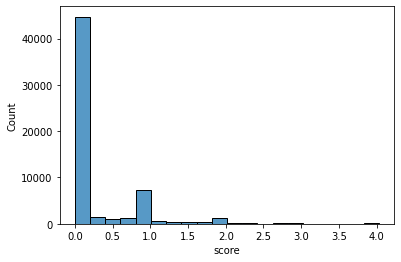

In [21]:
import seaborn as sns

sns.histplot(train_pa_final['score'], bins=20)

Upon further review, this could be treated as a regression or a classification problem. I plan on treating it as a classification problem with the following categories:

*   'None' (score == 0.0)
*   'Abnormal (D0)' (0.0 < score <= 1.0)
*   'Moderate (D1)' (1.0 < score <= 2.0)
*   'Severe (D2)' (2.0 < score <= 3.0)
*   'Extreme (D3)' (3.0 < score <= 4.0)
*   'Exceptional (D4)' (4.0 < score <= 5.0)

Before updating the classification values, the NaNs in the 'score' columns will need to be imputed. This is due to the fact that the meteorogical data is recorded every day but the drought data is recorded every week.



**Evaluation metric:**
Because the majority class frequency is much lower than 50%, accuracy will not be a good evaluation metric as it could be misleading. 
I plan to rely on ROCAUC as the evaluation metric and, in addition, plan to plot the confusion matrix and calculate the precision/recall for the different drought categories.

**Train/Validate/Test**

The split is time-based and was created by the Kaggle dataset author. The split is as follows:

Train: Jan. 1, 2000 to Dec. 31, 2016
Val: Jan. 1, 2017 to Dec. 31, 2018
Test: Jan. 1, 2019 to Dec. 31, 2020

In [22]:
val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/validation_timeseries/validation_timeseries.csv')
val.shape

(2268840, 21)

In [23]:
val_pa = wrangle(val) # Apply wrangle function to isolate Pennsylvania observations in the validation dataset

In [24]:
val_pa_final = pd.merge(left=val_pa, right=soil_pa, how='left', on='fips') # Merge with Soil_PA dataset

In [25]:
# Set date to DateTime format and use it as index

val_pa_final['date']= pd.to_datetime(val_pa_final['date'])
val_pa_final = val_pa_final.set_index('date')

In [26]:
val_pa_final.shape

(48910, 51)

In [27]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lambda DS/Unit 2/05.Portfolio Project/Drought Data/test_timeseries/test_timeseries.csv')
test.shape

(2271948, 21)

In [28]:
test_pa = wrangle(test) # Apply wrangle function to isolate Pennsylvania observations in the test dataset

In [29]:
test_pa_final = pd.merge(left=test_pa, right=soil_pa, how='left', on='fips') # Merge with Soil_PA dataset

In [30]:
# Set date to DateTime format and use it as index

test_pa_final['date']= pd.to_datetime(test_pa_final['date'])
test_pa_final = test_pa_final.set_index('date')

In [31]:
test_pa_final.shape

(48977, 51)

In [32]:
# Define function to fill the NaNs in the target vector using the interpolate method (with default options for linear interpolation)

def target_interpolate(y):
  y = y.interpolate(inplace = True)

  return y

In [33]:
target = 'score'
y_train = train_pa_final[target] # Create target vector for training dataset
y_val = val_pa_final[target] # Create target vector for validation dataset
y_test = test_pa_final[target] # Create target vector for test dataset

In [34]:
target_interpolate(y_train) # Apply target_interpolate function to training dataset

In [35]:
target_interpolate(y_val) # Apply target_interpolate function to validation dataset
target_interpolate(y_test) # Apply target_interpolate function to test dataset

In [36]:
#pd.set_option("display.max_rows", 500000)

In [37]:
# Manually replace first 3 NaN values in y_train (because those values were not interpolated by target_interpolate function)
for i in range(0, 3):
  y_train[i] = y_train[3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
# Manually replace first 2 NaN values in y_val (because those values were not interpolated by target_interpolate function)
for i in range(0, 2):
  y_val[i] = y_val[2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
X_train = train_pa_final.drop(columns = target) # Create feature matrix for training dataset
X_val = val_pa_final.drop(columns = target) # Create feature matrix for validation dataset
X_test = test_pa_final.drop(columns = target) # Create feature matrix for training dataset

# Set up problem as a Regression problem using Random Forest Regressor

In [ ]:
# Calculate Baseline Score

from sklearn.metrics import accuracy_score, r2_score

majority_class = y_train.mode() # Determine the majority class for y_train using Mode

y_pred = [majority_class] * len(y_train) # Assign the majority class to y_pred as as list of the same length as y_train

baseline_acc = r2_score(y_train, y_pred) # Calculate the accuracy score

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: -0.2464039003325238


In [ ]:
# Set up Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1, max_depth = 10, random_state = 42)

model.fit(X_train, y_train)

print('Training score is:', model.score(X_train, y_train))
print('Validation score is:', model.score(X_val, y_val))

Training score is: 0.18894849999807217
Validation score is: -0.013752618827363339


# Set up problem as a Classification problem using Random Forest Classifier

In [40]:
# Function to change target vector float values to drought categories

def drought_cat(y):
  none = (y == 0.0)
  abnormal = (y > 0.0) & (y <= 1.0)
  moderate = (y > 1.0) & (y <= 2.0)
  severe = (y > 2.0) & (y <= 3.0)
  extreme = (y > 3.0) & (y <= 4.0)
  exceptional = (y > 4.0) & (y <= 5.0)

  y.loc[none] = 'none'
  y.loc[abnormal] = 'abnormal'
  y.loc[moderate] = 'moderate'
  y.loc[severe] = 'severe'
  y.loc[extreme] = 'extreme'
  y.loc[exceptional] = 'exceptional'

  return y

In [41]:
drought_cat(y_train)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


date
2000-01-01        none
2000-01-02        none
2000-01-03        none
2000-01-04        none
2000-01-05        none
                ...   
2016-12-27    moderate
2016-12-28    moderate
2016-12-29    moderate
2016-12-30    moderate
2016-12-31    moderate
Name: score, Length: 416070, dtype: object

In [42]:
drought_cat(y_val)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


date
2017-01-01    moderate
2017-01-02    moderate
2017-01-03    moderate
2017-01-04    moderate
2017-01-05    moderate
                ...   
2018-12-27        none
2018-12-28        none
2018-12-29        none
2018-12-30        none
2018-12-31        none
Name: score, Length: 48910, dtype: object

In [43]:
# Calculate Baseline Score

from sklearn.metrics import accuracy_score

majority_class = y_train.mode() # Determine the majority class for y_train using Mode

y_pred = [majority_class] * len(y_train) # Assign the majority class to y_pred as as list of the same length as y_train

baseline_acc = accuracy_score(y_train, y_pred) # Calculate the accuracy score

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.6791885980724397


In [ ]:
# Set up Random Forest Classifier with 20 trees
from sklearn.ensemble import RandomForestClassifier

model_20t = RandomForestClassifier(n_jobs = -1, max_depth = 20, random_state = 42)

model_20t.fit(X_train, y_train)

print('Training score is:', model_20t.score(X_train, y_train))
print('Validation score is:', model_20t.score(X_val, y_val))

Training score is: 0.8513038671377412
Validation score is: 0.7647515845430383


In [ ]:
y_train.value_counts(normalize = True)

none           0.679189
abnormal       0.252265
moderate       0.054366
severe         0.010392
extreme        0.003776
exceptional    0.000012
Name: score, dtype: float64

In [ ]:
# # Set up Random Forest Classifier with class weights
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(
#     n_jobs = -1, 
#     max_depth = 15, 
#     class_weight= {'none' : 1, 'abnormal' : 2.72, 
#                    'moderate' : 13.6, 'severe' : 68, 'extreme' : 136, 
#                    'exceptional' : 136},
#     random_state = 42
# )

# model.fit(X_train, y_train)

# print('Training score is:', model.score(X_train, y_train))
# print('Validation score is:', model.score(X_val, y_val))

# # Using class_weight=>much worse performance

In [ ]:
# Set up Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_jobs = -1, 
    max_depth = 15, 
    random_state = 42
)

model.fit(X_train, y_train)

print('Training score is:', model.score(X_train, y_train))
print('Validation score is:', model.score(X_val, y_val))

Training score is: 0.7412839185713942
Validation score is: 0.7709875281128603


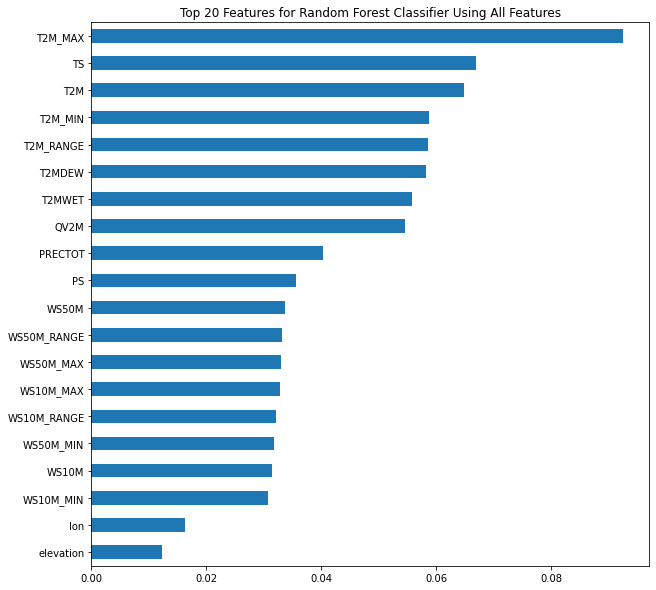

In [ ]:
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, X_train.columns)

n =20
plt.figure(figsize = (10, n/2))
plt.title(f'Top {n} Features for Random Forest Classifier Using All Features')
importances.sort_values()[-n:].plot.barh()

In [ ]:
#y_test = test_pa_final[target] # Create target vector for test dataset
#y_test

In [ ]:
target_interpolate(y_test) # Apply target_interpolate function to test dataset

In [44]:
drought_cat(y_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


date
2019-01-01        none
2019-01-02        none
2019-01-03        none
2019-01-04        none
2019-01-05        none
                ...   
2020-12-27    abnormal
2020-12-28    abnormal
2020-12-29    abnormal
2020-12-30    abnormal
2020-12-31    abnormal
Name: score, Length: 48977, dtype: object

In [ ]:
print('Test score is:', model.score(X_test, y_test))

Test score is: 0.745023174142965


# Use Undersampling

In [46]:
y_train.value_counts()

none           282590
abnormal       104960
moderate        22620
severe           4324
extreme          1571
exceptional         5
Name: score, dtype: int64

In [52]:
from imblearn.under_sampling import RandomUnderSampler
# Random Undersampling with Sampling Strategy

rus = RandomUnderSampler(sampling_strategy={'none' : 20000, 'abnormal' : 40000, 
                                            'moderate' : 20000, 'severe' : 4000,
                                            'extreme' : 1000, 'exceptional' : 5})

X_res, y_res = rus.fit_resample(X_train, y_train)

print(X_res.shape, y_res.shape)
print(pd.value_counts(y_res))

(85005, 50) (85005,)
abnormal       40000
none           20000
moderate       20000
severe          4000
extreme         1000
exceptional        5
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [53]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipe_robust = make_pipeline(
    RobustScaler(),
    RandomForestClassifier(n_jobs = -1, 
                           max_depth = 15,
                           random_state = 42)
)

pipe_robust.fit(X_res, y_res)

print('Training score is:', pipe_robust.score(X_res, y_res))
print('Validation score is:', pipe_robust.score(X_val, y_val))

Training score is: 0.7849891182871596
Validation score is: 0.2101615211613167


In [54]:
y_pred = pipe_robust.predict(X_test)
print('Test score for Undersample RF Model is:', accuracy_score(y_test, y_pred))

Test score for Undersample RF Model is: 0.255916042223901


In [55]:
# Random Undersampling with No Sampling Strategy

rus2 = RandomUnderSampler()

X_res2, y_res2 = rus2.fit_resample(X_train, y_train)

print(X_res2.shape, y_res2.shape)
print(pd.value_counts(y_res2))

(30, 50) (30,)
severe         5
moderate       5
extreme        5
none           5
abnormal       5
exceptional    5
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [56]:
pipe_robust2 = make_pipeline(
    RobustScaler(),
    RandomForestClassifier(n_jobs = -1, 
                           max_depth = 15,
                           random_state = 42)
)

pipe_robust2.fit(X_res2, y_res2)

print('Training score is:', pipe_robust2.score(X_res2, y_res2))
print('Validation score is:', pipe_robust2.score(X_val, y_val))

Training score is: 1.0
Validation score is: 0.27887957472909425


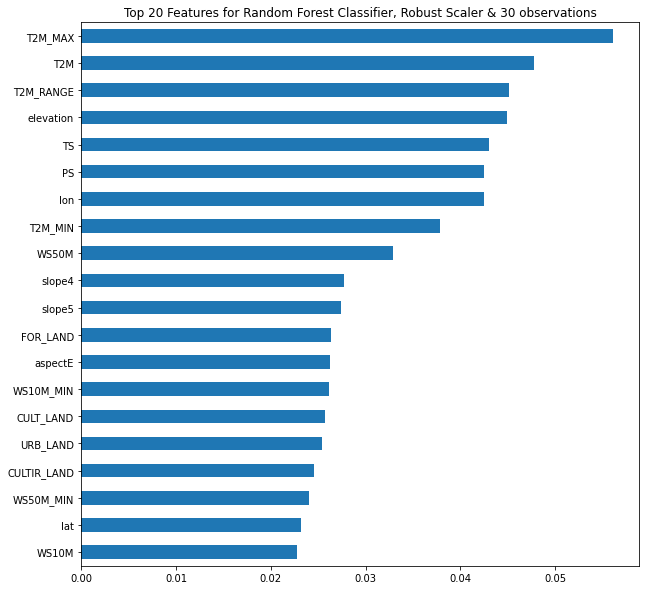

In [58]:
# Top 20 Features for Random Forest 15 trees, Robust Scaler & 30 observations
import matplotlib.pyplot as plt
rf_robust2 = pipe_robust2.named_steps['randomforestclassifier']

importances_robust2 = pd.Series(rf_robust2.feature_importances_, X_train.columns)

n =20
plt.figure(figsize = (10, n/2))
plt.title(f'Top {n} Features for Random Forest Classifier, Robust Scaler & 30 observations')
importances_robust2.sort_values()[-n:].plot.barh()

# Permutation of Best Feature from Random Forest Model

In [ ]:
perm_feature = 'T2M_MAX'
X_val[perm_feature].head(10)

date
2017-01-01    7.92
2017-01-02    3.24
2017-01-03    4.16
2017-01-04    8.41
2017-01-05   -1.55
2017-01-06   -2.75
2017-01-07   -5.34
2017-01-08   -7.32
2017-01-09   -4.95
2017-01-10    0.69
Name: T2M_MAX, dtype: float64

In [ ]:
# Permute the valuation dataset with the T2M_MAX feature
X_val_permuted = X_val.copy()
X_val_permuted[perm_feature] = np.random.permutation(X_val[perm_feature])

In [ ]:
X_val_permuted[perm_feature].head(10) # Verify permutation result

date
2017-01-01   -11.62
2017-01-02     2.41
2017-01-03     7.11
2017-01-04    24.15
2017-01-05    10.46
2017-01-06     9.16
2017-01-07    18.77
2017-01-08    26.61
2017-01-09    22.45
2017-01-10    25.92
Name: T2M_MAX, dtype: float64

In [ ]:
# Calculate the score with the permutated feature to determine its true importance

score_permuted= model.score(X_val_permuted, y_val)

print(f'Validation Score with {perm_feature}:{model.score(X_val, y_val)}')
print(f'Validation Score with {perm_feature} permuted:{score_permuted}')
print(f'Importance of {perm_feature}:{(model.score(X_val, y_val)) - score_permuted}')

Validation Score with T2M_MAX:0.7709875281128603
Validation Score with T2M_MAX permuted:0.7727254140257616
Importance of T2M_MAX:-0.0017378859129012492


# Use eli5 Library to Review Permutation Importance

In [ ]:
pip install eli5

     |████████████████████████████████| 112kB 5.4MB/s 


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
# Set Permutation Importance from eli5 library

permuter = PermutationImportance(
    model,
    scoring = 'accuracy',
    n_iter = 5,
    random_state = 42
)

permuter.fit(X_val, y_val) # No need to transform X_val as it is already in correct state; fit permuter on the validation dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=15,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_frac

In [ ]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

T2MWET           0.005529
T2MDEW           0.004052
QV2M             0.003304
PS               0.000961
WS10M_RANGE      0.000654
WS50M_MIN        0.000262
WS10M_MAX        0.000168
slope8           0.000025
SQ4              0.000004
NVG_LAND         0.000000
SQ7              0.000000
SQ3              0.000000
SQ5              0.000000
SQ6              0.000000
WAT_LAND        -0.000012
SQ1             -0.000016
SQ2             -0.000025
fips            -0.000041
slope6          -0.000065
WS10M           -0.000074
GRS_LAND        -0.000102
aspectS         -0.000106
slope1          -0.000110
slope3          -0.000123
aspectUnknown   -0.000135
WS10M_MIN       -0.000159
slope2          -0.000172
CULT_LAND       -0.000172
lat             -0.000188
aspectN         -0.000213
WS50M_RANGE     -0.000217
slope5          -0.000225
slope7          -0.000229
slope4          -0.000278
CULTIR_LAND     -0.000307
WS50M_MAX       -0.000339
aspectW         -0.000348
CULTRF_LAND     -0.000364
FOR_LAND    

In [ ]:
# Display weights for all features

eli5.show_weights(
    permuter,
    top = None,
    feature_names = feature_names
)

Weight,Feature
0.0055 ± 0.0005,T2MWET
0.0041 ± 0.0007,T2MDEW
0.0033 ± 0.0005,QV2M
0.0010 ± 0.0002,PS
0.0007 ± 0.0002,WS10M_RANGE
0.0003 ± 0.0003,WS50M_MIN
0.0002 ± 0.0003,WS10M_MAX
0.0000 ± 0.0002,slope8
0.0000 ± 0.0000,SQ4
0 ± 0.0000,NVG_LAND


In [ ]:
eli5.explain_weights(model, top = None, feature_names = feature_names)

Weight,Feature
0.0925 ± 0.0634,T2M_MAX
0.0669 ± 0.0383,TS
0.0649 ± 0.0398,T2M
0.0587 ± 0.0298,T2M_MIN
0.0586 ± 0.0329,T2M_RANGE
0.0581 ± 0.0197,T2MDEW
0.0558 ± 0.0168,T2MWET
0.0545 ± 0.0193,QV2M
0.0402 ± 0.0059,PRECTOT
0.0356 ± 0.0066,PS


# Set Up Drop Column to Determine Importance for T2M_MAX Feature

In [ ]:
# Drop column T2M_Max to determine its importance
feature_drop = 'T2M_MAX'

X_train_drop = X_train.drop(columns = feature_drop)
X_val_drop = X_val.drop(columns = feature_drop)

In [ ]:
# Set up Random Forest Classifier with Eliminated Feature

model_drop = RandomForestClassifier(
    n_jobs = -1, 
    max_depth = 15, 
    random_state = 42
)

model_drop.fit(X_train_drop, y_train)

print(f'Validation score with {feature_drop} is: {model.score(X_val, y_val)}')
print(f'Validation score without {feature_drop} is: {model_drop.score(X_val_drop, y_val)}')
print(f'The True Feature Importance of {feature_drop} is: {model.score(X_val, y_val) - model_drop.score(X_val_drop, y_val)}')

Validation score with T2M_MAX is: 0.7709875281128603
Validation score without T2M_MAX is: 0.7722756082600695
The True Feature Importance of T2M_MAX is: -0.0012880801472091585


# Set Up XGBoost Model

In [ ]:
import xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators = 1000,
    max_depth = 15,
    learning_rate = 0.5,
    n_jobs = -1,
    random_state = 42    
)

eval_set = [(X_train, y_train),
            (X_val, y_val)]

xgb_model.fit(X_train, y_train,
              eval_set = eval_set,
              eval_metric = 'merror',
              early_stopping_rounds = 50)

[0]	validation_0-merror:0.22937	validation_1-merror:0.266469
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.208628	validation_1-merror:0.260601
[2]	validation_0-merror:0.193645	validation_1-merror:0.258659
[3]	validation_0-merror:0.182601	validation_1-merror:0.259068
[4]	validation_0-merror:0.168887	validation_1-merror:0.259742
[5]	validation_0-merror:0.157007	validation_1-merror:0.260949
[6]	validation_0-merror:0.143783	validation_1-merror:0.262319
[7]	validation_0-merror:0.133768	validation_1-merror:0.264588
[8]	validation_0-merror:0.123991	validation_1-merror:0.266162
[9]	validation_0-merror:0.116142	validation_1-merror:0.267164
[10]	validation_0-merror:0.106463	validation_1-merror:0.26743
[11]	validation_0-merror:0.099082	validation_1-merror:0.268227
[12]	validation_0-merror:0.093061	validation_1-merror:0.269188
[13]	validation_0-merror:0.088

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print('Validation Accuracy for XGBoost Model (with Early Stopping) is:', xgb_model.score(X_val, y_val))

Validation Accuracy for XGBoost Model (with Early Stopping) is: 0.7413412390104274


In [ ]:
print('Test Accuracy for XGBoost Model (with Early Stopping) is:', xgb_model.score(X_test, y_test))

Test Accuracy for XGBoost Model (with Early Stopping) is: 0.7253200481858831


In [ ]:
# XGBoost Model No Early Stopping

xgb_model2 = XGBClassifier(
    n_estimators = 100,
    max_depth = 15,
    learning_rate = 1.0,
    n_jobs = -1,
    random_state = 42    
)

xgb_model2.fit(X_train, y_train)

print('Validation Accuracy for XGBoost Model (No Early Stopping) is:', xgb_model2.score(X_val, y_val))

Validation Accuracy for XGBoost Model (No Early Stopping) is: 0.708505418114905


In [ ]:
print('Test Accuracy for XGBoost Model (No Early Stopping) is:', xgb_model2.score(X_test, y_test))

Test Accuracy for XGBoost Model (No Early Stopping) is: 0.7031055393347898


In [ ]:
# XGBoost Model with No Early Stopping Overfit!!!

print('Training Accuracy for SGBoost Model (No Early Stopping) is:', xgb_model2.score(X_train, y_train))

Training Accuracy for SGBoost Model (No Early Stopping) is: 1.0


# Set Up ADA Boost Classifier

In [ ]:
# Set up ADA Boost Classifier

from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(
    n_estimators = 100,
    learning_rate = 0.5,
    random_state = 42
)

ada_model.fit(X_train, y_train)

print('Valuation Accuracy for ADA Boost Model:', ada_model.score(X_val, y_val))

Valuation Accuracy for ADA Boost Model: 0.023778368431813534


In [ ]:
print('Test Accuracy for ADA Boost Model is:', ada_model.score(X_test, y_test))

Test Accuracy for ADA Boost Model is: 0.01888641607285052


In [ ]:
print('Training Accuracy for ADA Boost Model:', ada_model.score(X_train, y_train))

Training Accuracy for ADA Boost Model: 0.015487778498810296


# Use GridSearchCV to Optimize Hyperparameters for Random Forest Classifier

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Set up parameters distributions fro Grid Search as follows: 
# # (1) RandomForestClassifier for maximum number of features

# param_distributions = {
#     'max_features' : np.arange(1, len(X_train.columns)+1),
#     'max_depth' : [10, 15, 25, None], 
#     'n_estimators' : [75, 100, 300],
#     'criterion' : ['gini', 'entropy'],
#  }

# # Set up a GridSearch

# search_grid = GridSearchCV(
#     model,
#     param_grid = param_distributions,
#     scoring = 'accuracy',
#     verbose = 10,
#     cv = 5,
#     n_jobs = -1,
#     refit = True,
#     return_train_score = True
# )

# search_grid.fit(X_train, y_train)

# Set Up Partial Dependence Plot

In [ ]:
pip install pdpbox

     |████████████████████████████████| 34.0MB 114kB/s 
     |████████████████████████████████| 13.1MB 7.3MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758228 sha256=575ce189b29423f4a9f31add69ec20c4c8590c652998a533492422047a4d855b
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


(<Figure size 1080x1620 with 7 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7ff4ded78550>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff4dfabcd90>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


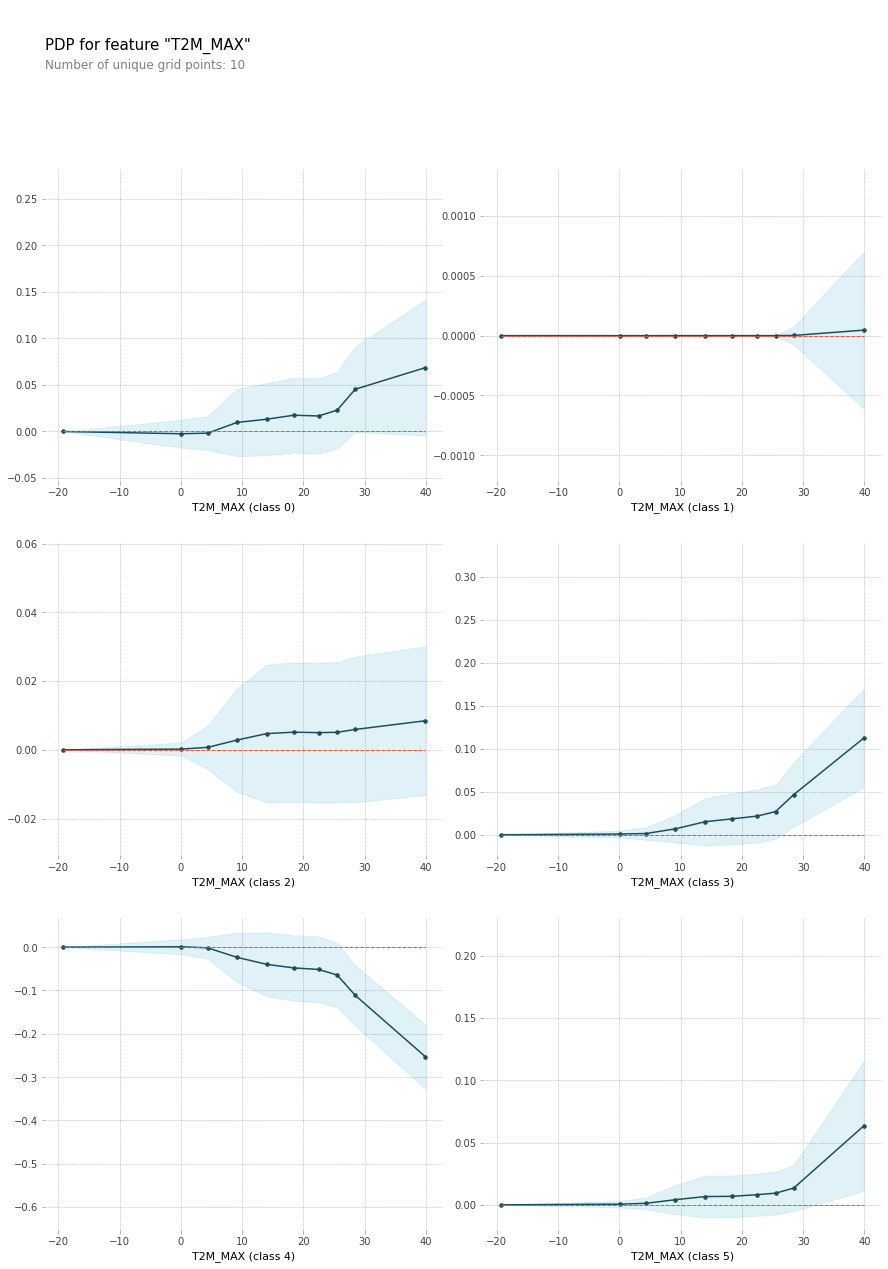

In [ ]:
# Set Up Partial Dependence Plot with 'T2M_MAX' Feature

from pdpbox import pdp

feature_pdp = 'T2M_MAX'

pdp_dist = pdp.pdp_isolate(
    model = model,
    dataset = X_train,
    model_features = feature_names,
    feature = feature_pdp
)

pdp.pdp_plot(pdp_dist, feature_pdp)

(<Figure size 1080x1620 with 7 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7ff4e143e510>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff4e14c2090>})

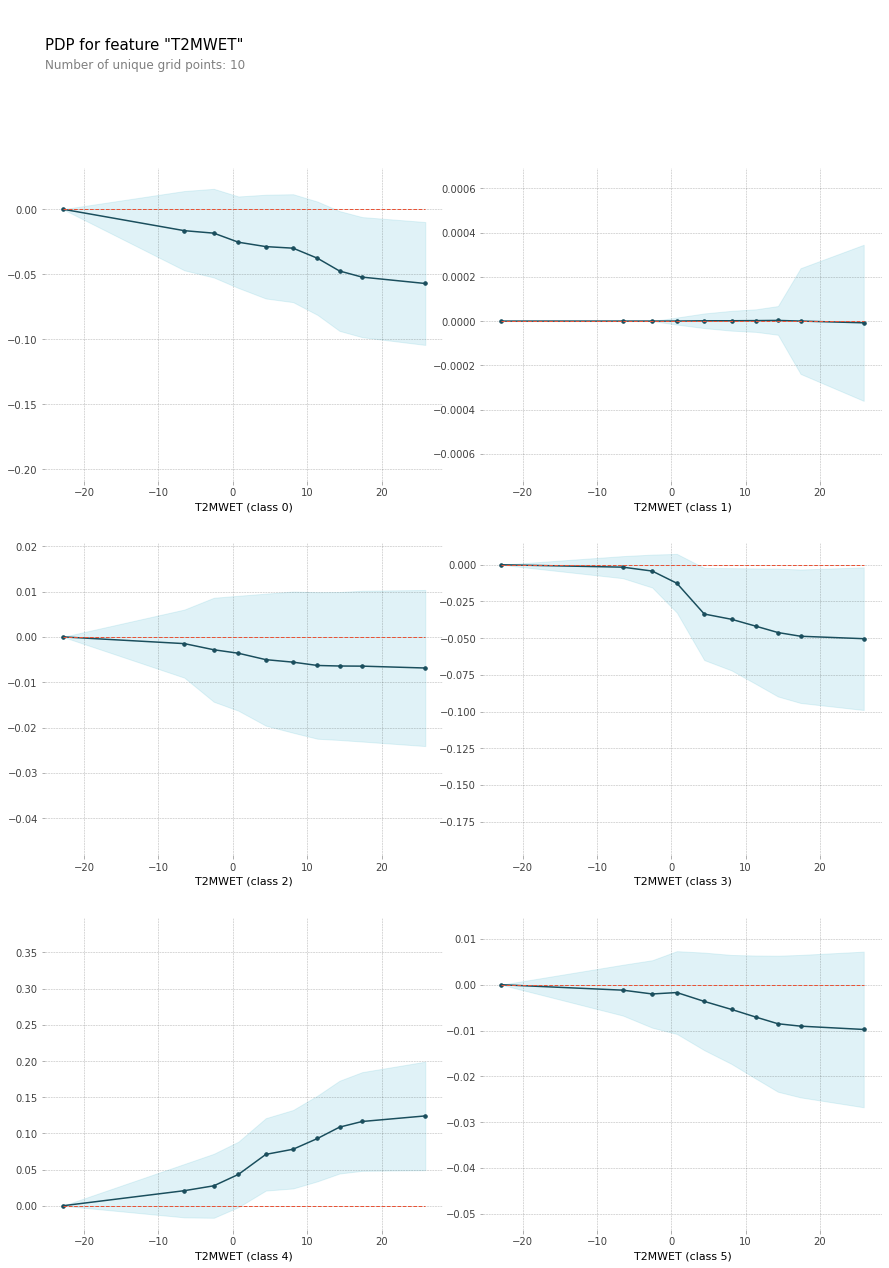

In [ ]:
# Set Up Partial Dependence Plot with 'T2MWET' Feature
feature_pdp_2 = 'T2MWET'

pdp_dist_2 = pdp.pdp_isolate(
    model = model,
    dataset = X_train,
    model_features = feature_names,
    feature = feature_pdp_2
)

pdp.pdp_plot(pdp_dist_2, feature_pdp_2)

In [ ]:
# Set Up Partial Dependence Plot with 'T2M_MAX' and 'T2MWET' Features

features_pdp = ['T2M_MAX', 'T2MWET']

interaction = pdp.pdp_interact(
    model = model,
    dataset = X_train,
    model_features = feature_names,
    features = features_pdp
)

pdp.pdp_interact_plot(interaction, plot_type = 'grid', feature_names = features_pdp)

# Set Up Shapley Plot

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 6.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491629 sha256=834bca150b458f61551cd58b37c8ff18db928a2e4ede2b30e08ccd34ffdcb202
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
y_test.tail(10)

date
2020-12-22    moderate
2020-12-23    abnormal
2020-12-24    abnormal
2020-12-25    abnormal
2020-12-26    abnormal
2020-12-27    abnormal
2020-12-28    abnormal
2020-12-29    abnormal
2020-12-30    abnormal
2020-12-31    abnormal
Name: score, dtype: object

In [ ]:
test_pa_final.tail(10)

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,aspectN,aspectE,aspectS,aspectW,aspectUnknown,WAT_LAND,NVG_LAND,URB_LAND,GRS_LAND,FOR_LAND,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-22,42133,0.09,99.60,3.71,0.28,-0.47,-0.10,2.60,-2.08,4.68,-0.51,4.29,5.51,3.06,2.44,8.05,9.15,6.28,2.87,moderate,39.921839,-76.728446,206,0.0027,0.0332,0.1871,0.4141,0.2392,0.1215,0.0022,0.0,0.3034,0.1826,0.2245,0.2536,0.0359,0.0,0.0,3.7574,5.30829,48.591888,41.989292,0.353132,42.342422,3,2,1,1,1,1,1
2020-12-23,42133,0.00,100.72,3.49,-0.07,-1.16,-0.61,3.57,-3.68,7.26,-2.18,3.07,4.24,0.55,3.69,5.37,7.78,0.71,7.07,abnormal,39.921839,-76.728446,206,0.0027,0.0332,0.1871,0.4141,0.2392,0.1215,0.0022,0.0,0.3034,0.1826,0.2245,0.2536,0.0359,0.0,0.0,3.7574,5.30829,48.591888,41.989292,0.353132,42.342422,3,2,1,1,1,1,1
2020-12-24,42133,22.61,99.21,6.87,7.88,7.88,7.88,13.68,1.42,12.26,7.22,6.69,10.98,3.34,7.63,10.61,16.04,6.15,9.90,abnormal,39.921839,-76.728446,206,0.0027,0.0332,0.1871,0.4141,0.2392,0.1215,0.0022,0.0,0.3034,0.1826,0.2245,0.2536,0.0359,0.0,0.0,3.7574,5.30829,48.591888,41.989292,0.353132,42.342422,3,2,1,1,1,1,1
2020-12-25,42133,19.96,98.50,3.44,-0.35,-1.62,-0.99,14.18,-6.46,20.65,-0.22,6.57,8.95,5.38,3.57,8.94,13.38,7.27,6.11,abnormal,39.921839,-76.728446,206,0.0027,0.0332,0.1871,0.4141,0.2392,0.1215,0.0022,0.0,0.3034,0.1826,0.2245,0.2536,0.0359,0.0,0.0,3.7574,5.30829,48.591888,41.989292,0.353132,42.342422,3,2,1,1,1,1,1
2020-12-26,42133,0.03,99.70,1.98,-4.77,-8.67,-6.72,-2.08,-6.98,4.90,-4.54,4.71,6.00,2.38,3.61,6.72,8.20,3.91,4.29,abnormal,39.921839,-76.728446,206,0.0027,0.0332,0.1871,0.4141,0.2392,0.1215,0.0022,0.0,0.3034,0.1826,0.2245,0.2536,0.0359,0.0,0.0,3.7574,5.30829,48.591888,41.989292,0.353132,42.342422,3,2,1,1,1,1,1
2020-12-27,42133,0.00,100.52,2.53,-2.93,-5.44,-4.18,1.83,-7.48,9.31,-3.06,2.50,4.21,0.56,3.65,4.28,7.02,0.63,6.39,abnormal,39.921839,-76.728446,206,0.0027,0.0332,0.1871,0.4141,0.2392,0.1215,0.0022,0.0,0.3034,0.1826,0.2245,0.2536,0.0359,0.0,0.0,3.7574,5.30829,48.591888,41.989292,0.353132,42.342422,3,2,1,1,1,1,1
2020-12-28,42133,0.03,100.18,4.09,1.79,0.97,1.38,7.50,-1.35,8.85,1.27,3.98,4.69,2.63,2.06,6.79,8.24,5.00,3.23,abnormal,39.921839,-76.728446,206,0.0027,0.0332,0.1871,0.4141,0.2392,0.1215,0.0022,0.0,0.3034,0.1826,0.2245,0.2536,0.0359,0.0,0.0,3.7574,5.30829,48.591888,41.989292,0.353132,42.342422,3,2,1,1,1,1,1
2020-12-29,42133,0.00,101.19,2.73,-1.03,-4.36,-2.69,1.74,-3.20,4.95,-1.41,3.97,6.22,1.50,4.72,6.73,8.27,2.63,5.64,abnormal,39.921839,-76.728446,206,0.0027,0.0332,0.1871,0.4141,0.2392,0.1215,0.0022,0.0,0.3034,0.1826,0.2245,0.2536,0.0359,0.0,0.0,3.7574,5.30829,48.591888,41.989292,0.353132,42.342422,3,2,1,1,1,1,1
2020-12-30,42133,0.01,100.74,3.07,-0.25,-2.85,-1.55,2.85,-3.40,6.25,-0.60,4.48,7.03,1.90,5.13,7.18,10.87,3.75,7.12,abnormal,39.921839,-76.728446,206,0.0027,0.0332,0.1871,0.4141,0.2392,0.1215,0.0022,0.0,0.3034,0.1826,0.2245,0.2536,0.0359,0.0,0.0,3.7574,5.30829,48.591888,41.989292,0.353132,42.342422,3,2,1,1,1,1,1


In [ ]:
# Isolate Observation No. 48976 (last observation) for Shapley plot
row = X_test.iloc[[48976]]

In [ ]:
y_test.iloc[[48976]] # True classification for Observation No. 48976 (last observation)

date
2020-12-31    abnormal
Name: score, dtype: object

In [ ]:
model.predict(row) # Predicted classification for Observation No. 48976 (last observation)

array(['none'], dtype=object)

***Model Predicted Observation No. 48976 (last observation) Incorrectly***

In [ ]:
# List of the classes in the model and their order
# Due to lexicographical ordering of classes: 
# Class 0 = 'abnormal', Class 1 = ''exceptional', Class 2 = 'extreme', 
# Class 3 = 'moderate', Class 4 = 'none', and Class 5 = 'severe'

model.classes_

array(['abnormal', 'exceptional', 'extreme', 'moderate', 'none', 'severe'],
      dtype=object)

In [ ]:
y_test.value_counts()

none        35828
abnormal     8350
moderate     4292
severe        507
Name: score, dtype: int64

In [ ]:
import shap

explainer = shap.TreeExplainer(model) # Set Shapley Tree Explainer
shap_values = explainer.shap_values(row)

shap.initjs()

shap.force_plot(
    base_value = explainer.expected_value[4], # Must use value [4] because that is Class 4 = 'none' (the predicted value)
    shap_values = shap_values[4],
    features = row,
    link='logit'
)

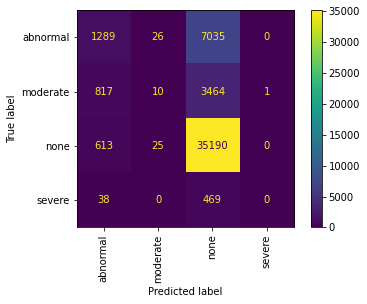

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, values_format = '.0f', 
                      xticks_rotation = 'vertical', 
                      labels = ['abnormal', 'moderate', 'none', 'severe'])

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    abnormal       0.47      0.15      0.23      8350
    moderate       0.16      0.00      0.00      4292
        none       0.76      0.98      0.86     35828
      severe       0.00      0.00      0.00       507

    accuracy                           0.75     48977
   macro avg       0.35      0.28      0.27     48977
weighted avg       0.65      0.75      0.67     48977

